#  Lab Assignment Three: Extending Logistic Regression

### Group : Lone Wolf

####  Member : Yang Shen

# Business Understanding

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. This dataset contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event. I filter the dataset to only focus on the USA team data. It will reduce the size of the dataset to 14214 rows. The columns are:

- ID - Unique number for each athlete each event
- Name - Athlete's name
- Sex – M (1) or F(0)
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- NOC – Nation name 3-letter code (USA)
- Year - Integer
- Season – Summer (0) or Winter(1)
- City - Host city (convert to numeric)
- Sport – Sport event name (convert to numeric)
- Medal – Gold (3), Silver(2), Bronze(1), or No(0)

My task is to classify which medal will athlete get or not. When the Olympic games hold, people will be really excited about it and watch the games on tv or the internet. Everyone is guessing who will get the gold medal. The party who interested in my study is the sports channel. They can use my study to predict or classifier who will get which medal. 

In China, some sports channel has Prize Quiz which allows people in front of the tv to guess who will get the gold medal, silver and so on. It worked like the gamble, it has odds. The odds will be determined by classification. If one athlete we predict is gold, we will set the odds low. Which means that this athlete has a high chance to win the gold medal. If you guess correctly, you will not win too much. The same story for an athlete we predict will not get any medal. He/she will have higher odds if he/she gets a medal. 

The accuracy of my model should be high, I think 80% is good. If the accuracy is too low, the tv channel will lose money because of the odds-setting. The true positive rate should also as high as possible, maybe 80%. The false positive rate should be low in order to avoid high odds on the athlete who has a low chance to get a medal. I think 10% of false positive is good. I do not really know how to set odds, leave it to professional people. My task is classified(prediction) athlete to different medal or no medal. 

This model does not need to run so fast, because the sports channel can get the athlete data before the event. But it needs to be accuracy. 

# Data Description

In [599]:
#https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
# load the dataset
import pandas as pd
import numpy as np

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

dfraw = pd.read_csv('https://raw.githubusercontent.com/sy0701611/lab-3/master/athlete_events.csv',error_bad_lines=False) 
# read in the csv file,offending lines to be skipped
dfraw.dropna(inplace=True)#drop all na value beacsue row with na is not useful
dfraw.head() 

Pandas: 0.23.4
Numpy: 1.15.4


,ID,name,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Medal
0,6,Per Knut Aaland,1,31,188,75.0,USA,1992,Winter,Albertville,Cross Country Skiing,0
1,6,Per Knut Aaland,1,31,188,75.0,USA,1992,Winter,Albertville,Cross Country Skiing,0
2,6,Per Knut Aaland,1,31,188,75.0,USA,1992,Winter,Albertville,Cross Country Skiing,0
3,6,Per Knut Aaland,1,31,188,75.0,USA,1992,Winter,Albertville,Cross Country Skiing,0
4,6,Per Knut Aaland,1,33,188,75.0,USA,1994,Winter,Lillehammer,Cross Country Skiing,0


In [600]:
#general information about the raw dataset.
print('===========')
print(dfraw.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14214 entries, 0 to 14213
Data columns (total 12 columns):
ID        14214 non-null int64
name      14214 non-null object
Sex       14214 non-null int64
Age       14214 non-null int64
Height    14214 non-null int64
Weight    14214 non-null float64
NOC       14214 non-null object
Year      14214 non-null int64
Season    14214 non-null object
City      14214 non-null object
Sport     14214 non-null object
Medal     14214 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 1.4+ MB
None


I drop ID becasue ID here is meaningless, can not help with classification. NOC is drpped because it is all USA. Also the name is useless. The year is also not helpful, because this is not time serise problem, we can treat each year as a individual event and last year event will not effect the next year.

In [601]:
# data type and information
# subset i am interested
#change category variable to numeric, and drop the old variables
df = dfraw[['Sex','Age','Height','Weight','Season','Sport','Medal','City']]
df.City = pd.Categorical(df.City)
df['Citycode'] = df.City.cat.codes
df.Sport = pd.Categorical(df.Sport)
df['Sportcode'] = df.Sport.cat.codes
df.Season = pd.Categorical(df.Season)
df['Seasoncode'] = df.Season.cat.codes
df = df.drop("Season", axis=1)
df = df.drop("Sport", axis=1)
df = df.drop("City", axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14214 entries, 0 to 14213
Data columns (total 8 columns):
Sex           14214 non-null int64
Age           14214 non-null int64
Height        14214 non-null int64
Weight        14214 non-null float64
Medal         14214 non-null int64
Citycode      14214 non-null int8
Sportcode     14214 non-null int8
Seasoncode    14214 non-null int8
dtypes: float64(1), int64(4), int8(3)
memory usage: 707.9 KB
None


D:\APP\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
D:\APP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\APP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#in

The new variable I created is just convert category variables to numeric. Which is city, sport and season. Numeric variable will be easy to analysis in our model.

In [602]:
# find the duplicate 
idx = df.duplicated()
len(df[idx])

3023

Do not drop duplicate value becasue in sport, player's weight and other parameter are similar. Also some player can join mutiple events in one Olympics. So duplicate value can not be dropped.

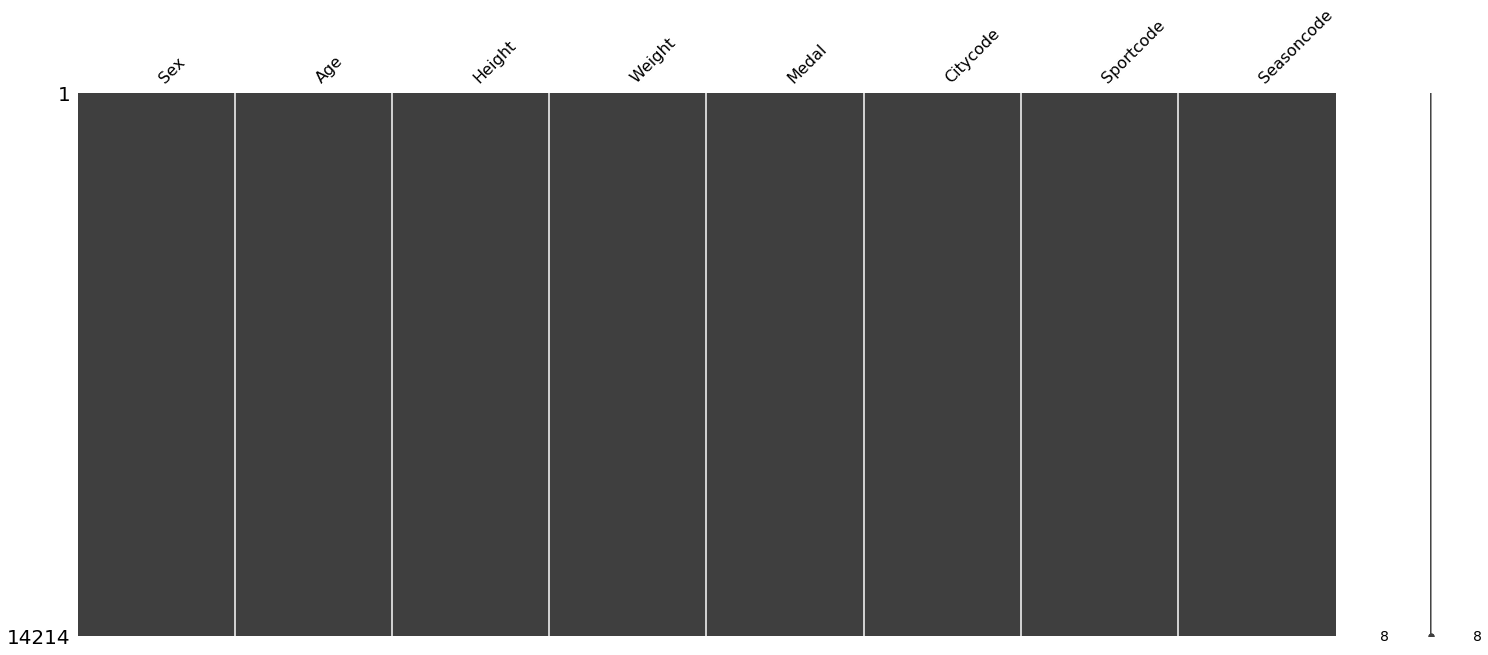

In [603]:
# plot missing variable
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

mn.matrix(df.sort_values(by=["Citycode",]))

No missing value which is good, we already drop them at the beginning.

In [605]:
print(df.dtypes)
print('===========')
print(df.info())
df.head() 

Sex             int64
Age             int64
Height          int64
Weight        float64
Medal           int64
Citycode         int8
Sportcode        int8
Seasoncode       int8
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14214 entries, 0 to 14213
Data columns (total 8 columns):
Sex           14214 non-null int64
Age           14214 non-null int64
Height        14214 non-null int64
Weight        14214 non-null float64
Medal         14214 non-null int64
Citycode      14214 non-null int8
Sportcode     14214 non-null int8
Seasoncode    14214 non-null int8
dtypes: float64(1), int64(4), int8(3)
memory usage: 707.9 KB
None


,Sex,Age,Height,Weight,Medal,Citycode,Sportcode,Seasoncode
0,1,31,188,75.0,0,0,12,1
1,1,31,188,75.0,0,0,12,1
2,1,31,188,75.0,0,0,12,1
3,1,31,188,75.0,0,0,12,1
4,1,33,188,75.0,0,16,12,1


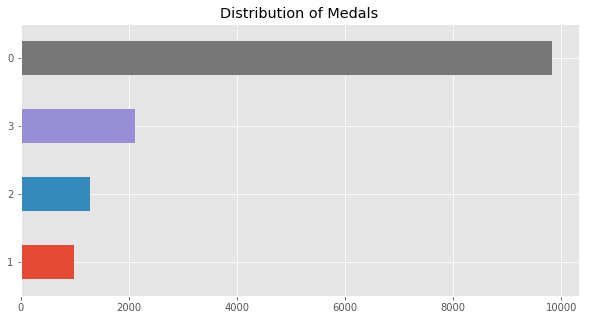

In [629]:
plt.style.use('ggplot')

plt.figure(figsize=(10,5))
dfraw['Medal'].value_counts(sort=True,ascending=True).plot(kind='barh')
plt.title('Distribution of Medals')

plt.show()

Gold (3), Silver(2), Bronze(1), or No(0)

We can see that for the most of time, athlete will not get medal. USA team get more gold than other medal is really impressive.

# Splite training and testing set

In [606]:
from sklearn.model_selection import train_test_split

X = df.drop("Medal", axis=1).as_matrix()
y = df["Medal"].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


D:\APP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\APP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


I think 80/20 splite is appropriate for my dataset. My dataset contain over 14 thousand rows. Even we ramdomly splite, training set and testing will contain enough information. The testing set have 3000 rows which is not too small. If my dataset is small, testing set will be too small, so 80/20 is not appropriate for small dataset.

# Modeling

In [607]:
#https://github.com/maykulkarni/Machine-Learning-Notebooks/tree/master/03.%20Classification
#https://github.com/Thakugan/machine-learning-notebooks
#both source give me idea of how to construct 
import pandas as pd
import numpy as np
from scipy.special import expit
from numpy import seterr
from sklearn.metrics import accuracy_score
from numpy.linalg import pinv

class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return 1/(1+np.exp(-theta)) 
    
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
# inherit from base class
class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_bias=False))*xi 
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape) 
        
        return gradient/float(len(y))
       
    # public:
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 

# now lets do some vectorized coding
import numpy as np
from scipy.special import expit

class VectorBinaryLogisticRegression(BinaryLogisticRegression):
    # inherit from our previous class to get same functionality
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # but overwrite the gradient calculation
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        return gradient.reshape(self.w_.shape)
class LogisticRegression:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            blr = VectorBinaryLogisticRegression(self.eta,self.iters)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return np.argmax(self.predict_proba(X),axis=1) # take argmax along row


# Choose optimization technique(only show do not run)

In [47]:
%%time
#steepest descent
class SteepestLogisticRegression(BinaryLogisticRegression):
     def _get_gradient_Steepest(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(self.w_.shape) 
        
        return gradient

Wall time: 0 ns


In [48]:
%%time
#stochastic gradient
class StochasticLogisticRegression(BinaryLogisticRegression):
    # stochastic gradient calculation 
    def _get_gradient_Stochastic(self,X,y):
        idx = int(np.random.rand()*len(y)) # grab random instance
        ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
        gradient = X[idx] * ydiff[:,np.newaxis] # make ydiff a column vector and multiply through
        
        gradient = gradient.reshape(self.w_.shape)
        
        return gradient

Wall time: 0 ns


In [49]:
%%time
# Newton's method
from numpy.linalg import pinv
class HessianBinaryLogisticRegression(BinaryLogisticRegression):
    # just overwrite gradient function
    def _get_gradient_Hessian(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(g*(1-g)) @ X # calculate the hessian

        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        
        return pinv(hessian) @ gradient

Wall time: 0 ns


# Regulation(only show do not run)

In [ ]:
#L1
#L1 https://towardsdatascience.com/only-numpy-implementing-different-combination-of-l1-norm-l2-norm-l1-regularization-and-14b01a9773b
class RegularizedBinaryLogisticRegression(VectorBinaryLogisticRegression):
    # extend init functions
    def __init__(self, C=0.0, **kwds):        
        # need to add to the original initializer 
        self.C = C
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer
        
        
    # extend previous class to change functionality
    def _get_gradient(self,X,y):
        # call get gradient from previous class
        gradient = super()._get_gradient(X,y)
        
        # add in regularization (to all except bias term)
        #derivative of |x| is X/|X| which is the sign of X, so we can direct use np.sign
        gradient[1:] += np.sign(self.w_[1:])* self.C
        return gradient

In [51]:
#L2
class RegularizedBinaryLogisticRegression(VectorBinaryLogisticRegression):
    # extend init functions
    def __init__(self, C=0.0, **kwds):        
        # need to add to the original initializer 
        self.C = C
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer
        
        
    # extend previous class to change functionality
    def _get_gradient(self,X,y):
        # call get gradient from previous class
        gradient = super()._get_gradient(X,y)
        
        # add in regularization (to all except bias term)
        gradient[1:] += -2 * self.w_[1:] * self.C
        return gradient

In [52]:
#L1L2
class RegularizedBinaryLogisticRegression(VectorBinaryLogisticRegression):
    # extend init functions
    def __init__(self, C=0.0, **kwds):        
        # need to add to the original initializer 
        self.C = C
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer
        
        
    # extend previous class to change functionality
    def _get_gradient(self,X,y):
        # call get gradient from previous class
        gradient = super()._get_gradient(X,y)
        
        # add in regularization (to all except bias term)
        gradient[1:] += (-2 * self.w_[1:] * self.C) + (np.sign(self.w_[1:]) * self.C)
        return gradient

# Overall(start running here)

In [608]:
from numpy import seterr
from sklearn.metrics import accuracy_score
from numpy.linalg import pinv

np.seterr(over='print')

class MethodRegulationBinaryLogisticRegression(BinaryLogisticRegression):     
    def __init__(self, method="Steepest", C=0.1, regulation="L1", eta=0.1, **kwads):
        self.method = method
        self.C = C
        self.regulation = regulation
        self.eta=eta
        super().__init__(eta=eta,**kwads)# call parent initializer

    
    def _get_gradient_Steepest(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(self.w_.shape) 
    
        return gradient
    
    def _get_gradient_Stochastic(self,X,y):
        idx = int(np.random.rand()*len(y)) # grab random instance
        ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
        gradient = X[idx] * ydiff[:,np.newaxis] # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        
        return gradient
    
    def _get_gradient_Newton(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(g*(1-g)) @ X# calculate the hessian
        #here i delete the regulation term because we will use different way of regulation
        #also base on the hessian calculation pdf, there is no regulation in original calculation

        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        
        return pinv(hessian) @ gradient

#https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac
#this give me the idea of how I can select different method
#  def fit(self, X, y):
#        if self.fit_intercept:
#           X = self.__add_intercept(X)
            
    def _get_gradient(self, X, y):# method selection using if, we can upgrade the gradient by using different technique,
        if self.method == "Steepest":# if the keyword match the technique, then the gradient will equal to the technique way to calculate it
            gradient = self._get_gradient_Steepest(X, y)
        elif self.method == "Stochastic":
            gradient = self._get_gradient_Stochastic(X, y)
        elif self.method == "Newton":
            gradient = self._get_gradient_Newton(X, y)
        else:
            return
        #regulation selection using if by add regulation term after the gradient function
        if self.regulation == "L1":# we will upgrade the gradient by adding regulation term to it. this is also key word matching
            gradient[1:] += np.sign(self.w_[1:]) * self.C  
        #derivative of |x| is X/|X| which is the sign of X, so we can direct use np.sign    
        elif self.regulation == "L2":
            gradient[1:] += -2 * self.w_[1:] * self.C  
        elif self.regulation == "L1L2":
            #L1L2 is L1 + L2 
            gradient[1:] += ((-2 * self.w_[1:] * self.C) + (np.sign(self.w_[1:]) * self.C)) 
        elif self.regulation == "none":
            #for none regulation, we will keep the gradient the same
            gradient = gradient
        else:
            pass
                
        return gradient
       
  

In [609]:
class RegularizedMethodLogisticRegression(LogisticRegression):
    def __init__(self, method="Newton", C=0.1, regulation="L1", eta=0.1, iters=100,**kwads):
        self.method = method
        self.C = C
        self.regulation = regulation
        self.eta=eta
        self.iters = iters
        super().__init__(eta=eta,**kwads)# call parent initializer

    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            blr = MethodRegulationBinaryLogisticRegression(eta=self.eta,
                                                      iterations=self.iters,
                                                      regulation=self.regulation,
                                                      method=self.method, 
                                                      C=self.C)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return np.argmax(self.predict_proba(X),axis=1) # take argmax along row


# Testing set result for each method and regulation

In [610]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Steepest

In [516]:
%%time

params = dict(method="Steepest", C=0.1, regulation="L1", eta=0.1, iters=100)
lr = RegularizedMethodLogisticRegression(**params)
lr.fit(X_train,y_train)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.6992613436510728
Wall time: 114 ms


In [517]:
%%time

params = dict(method="Steepest", C=0.1, regulation="L2", eta=0.1, iters=100)
lr = RegularizedMethodLogisticRegression(**params)
lr.fit(X_train,y_train)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.06225817798100598
Wall time: 116 ms


In [518]:
%%time

params = dict(method="Steepest", C=0.1, regulation="L1L2", eta=0.1, iters=100)
lr = RegularizedMethodLogisticRegression(**params)
lr.fit(X_train,y_train)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.06225817798100598
Wall time: 116 ms


In [519]:
%%time

params = dict(method="Steepest", C=0.1, regulation="none", eta=0.1, iters=100)
lr = RegularizedMethodLogisticRegression(**params)
lr.fit(X_train,y_train)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.6992613436510728
Wall time: 117 ms


# Stochastic 

In [520]:
%%time

params = dict(method="Stochastic", C=0.1, regulation="L1", eta=0.1, iters=100)
lr = RegularizedMethodLogisticRegression(**params)
lr.fit(X_train,y_train)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.15546957439324657
Wall time: 3.97 ms


In [521]:
%%time

params = dict(method="Stochastic", C=0.1, regulation="L2", eta=0.1, iters=100)
lr = RegularizedMethodLogisticRegression(**params)
lr.fit(X_train,y_train)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.06225817798100598
Wall time: 3.57 ms


In [527]:
%%time

params = dict(method="Stochastic", C=0.1, regulation="L1L2", eta=0.1, iters=100)
lr = RegularizedMethodLogisticRegression(**params)
lr.fit(X_train,y_train)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.08301090397467464
Wall time: 3.97 ms


In [526]:
%%time

params = dict(method="Stochastic", C=0.1, regulation="none", eta=0.1, iters=100)
lr = RegularizedMethodLogisticRegression(**params)
lr.fit(X_train,y_train)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.6992613436510728
Wall time: 2.98 ms


# Newton

In [553]:
%%time

params = dict(method="Newton", C=0.1, regulation="L1", eta=0.1, iters=100)
lr = RegularizedMethodLogisticRegression(**params)
lr.fit(X_train,y_train)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.15828350334154062
Wall time: 13.8 s


In [554]:
%%time

params = dict(method="Newton", C=0.1, regulation="L2", eta=0.1, iters=100)
lr = RegularizedMethodLogisticRegression(**params)
lr.fit(X_train,y_train)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.6992613436510728
Wall time: 13.8 s


In [555]:
%%time

params = dict(method="Newton", C=0.1, regulation="L1L2", eta=0.1, iters=100)
lr = RegularizedMethodLogisticRegression(**params)
lr.fit(X_train,y_train)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.15230390432641575
Wall time: 14.1 s


In [531]:
%%time

params = dict(method="Newton", C=0.1, regulation="none", eta=0.1, iters=100)
lr = RegularizedMethodLogisticRegression(**params)
lr.fit(X_train,y_train)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.6999648258881463
Wall time: 14.8 s


# Find the best parameters

MAX Accuracy for Steepest L1 is  0.6992613436510728
C is  0.01
Wall time: 11 s


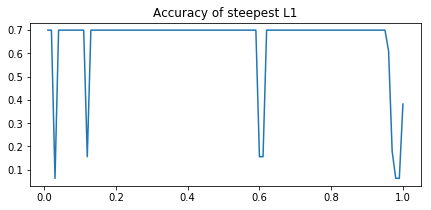

In [532]:
%%time
#Steepest L1
C_series = np.linspace(0.01,1,100) #generate a series number of C values
maxacc = 0
acc=[]
for i in C_series:
    lr = RegularizedMethodLogisticRegression(method="Steepest", C=i, regulation="L1", eta=0.1, iters=100)
    lr.fit(X_train,y_train)
    yhat = lr.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    if accuracy_score(y_test,yhat) > maxacc: #if the accuracy is larger than pivious one, it will equal to the new largest value
        maxacc = accuracy_score(y_test,yhat) #we keep doing this until try all the c values and find out the largest accuracy and its C value
        maxg = i   
print('MAX Accuracy for Steepest L1 is ', maxacc)
print('C is ',maxg)
plt.figure(figsize=(7,3))
plt.plot(C_series, acc)
plt.title('Accuracy of steepest L1')

MAX Accuracy for Steepest L2 is  0.6992613436510728
C is  0.01
Wall time: 10.8 s


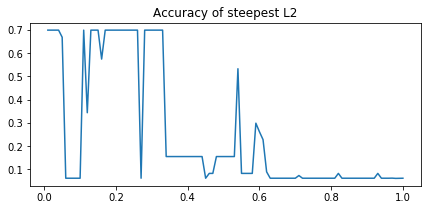

In [533]:
%%time
#Steepest L2
C_series = np.linspace(0.01,1,100) #generate a series number of C values
maxacc = 0
acc=[]
for i in C_series:
    lr = RegularizedMethodLogisticRegression(method="Steepest", C=i, regulation="L2", eta=0.1, iters=100)
    lr.fit(X_train,y_train)
    yhat = lr.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    if accuracy_score(y_test,yhat) > maxacc: #if the accuracy is larger than pivious one, it will equal to the new largest value
        maxacc = accuracy_score(y_test,yhat) #we keep doing this until try all the c values and find out the largest accuracy and its C value
        maxg = i
print('MAX Accuracy for Steepest L2 is ', maxacc)
print('C is ',maxg)
plt.figure(figsize=(7,3))
plt.plot(C_series, acc)
plt.title('Accuracy of steepest L2')

MAX Accuracy for Steepest L1L2 is  0.6992613436510728
C is  0.01
Wall time: 10.6 s


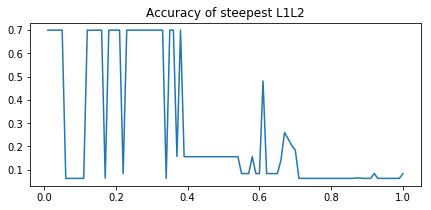

In [534]:
%%time
#Steepest L1L2
C_series = np.linspace(0.01,1,100) #generate a series number of C values
maxacc = 0
acc=[]
for i in C_series:
    lr = RegularizedMethodLogisticRegression(method="Steepest", C=i, regulation="L1L2", eta=0.1, iters=100)
    lr.fit(X_train,y_train)
    yhat = lr.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    if accuracy_score(y_test,yhat) > maxacc: #if the accuracy is larger than pivious one, it will equal to the new largest value
        maxacc = accuracy_score(y_test,yhat) #we keep doing this until try all the c values and find out the largest accuracy and its C value
        maxg = i
print('MAX Accuracy for Steepest L1L2 is ', maxacc)
print('C is ',maxg)
plt.figure(figsize=(7,3))
plt.plot(C_series, acc)
plt.title('Accuracy of steepest L1L2')

MAX Accuracy for Steepest none is  0.6992613436510728
C is  0.01
Wall time: 11.3 s


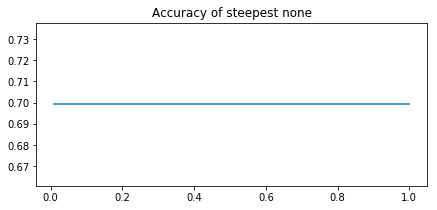

In [535]:
%%time
#Steepest none
C_series = np.linspace(0.01,1,100) #generate a series number of C values
maxacc = 0
acc=[]
for i in C_series:
    lr = RegularizedMethodLogisticRegression(method="Steepest", C=i, regulation="none", eta=0.1, iters=100)
    lr.fit(X_train,y_train)
    yhat = lr.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    if accuracy_score(y_test,yhat) > maxacc: #if the accuracy is larger than pivious one, it will equal to the new largest value
        maxacc = accuracy_score(y_test,yhat) #we keep doing this until try all the c values and find out the largest accuracy and its C value
        maxg = i
print('MAX Accuracy for Steepest none is ', maxacc)
print('C is ',maxg)
plt.figure(figsize=(7,3))
plt.plot(C_series, acc)
plt.title('Accuracy of steepest none')

For steepest, we can see that as long as C is small, the accuracy will be high. And also some other C values will reach the highest accuracy, but low C value have more frequency to reach high accuracy. Without any regulation, the accuracy will not change which make sense, because the gradient do not vary due to the change value of C.

MAX Accuracy for Stochastic L1 is  0.6992613436510728
C is  0.01
Wall time: 330 ms


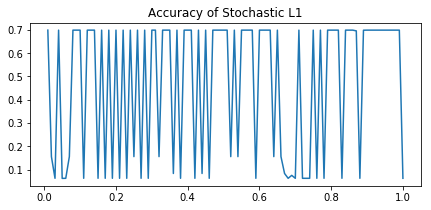

In [537]:
%%time
#Stochastic L1
C_series = np.linspace(0.01,1,100) #generate a series number of C values
maxacc = 0
acc=[]
for i in C_series:
    lr = RegularizedMethodLogisticRegression(method="Stochastic", C=i, regulation="L1", eta=0.1, iters=100)
    lr.fit(X_train,y_train)
    yhat = lr.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    if accuracy_score(y_test,yhat) > maxacc: #if the accuracy is larger than pivious one, it will equal to the new largest value
        maxacc = accuracy_score(y_test,yhat) #we keep doing this until try all the c values and find out the largest accuracy and its C value
        maxg = i
print('MAX Accuracy for Stochastic L1 is ', maxacc)
print('C is ',maxg)
plt.figure(figsize=(7,3))
plt.plot(C_series, acc)
plt.title('Accuracy of Stochastic L1')

MAX Accuracy for Stochastic L2 is  0.6992613436510728
C is  0.02
Wall time: 275 ms


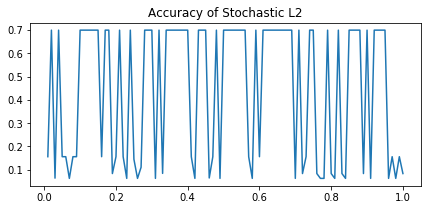

In [538]:
%%time
#Stochastic L2
C_series = np.linspace(0.01,1,100) #generate a series number of C values
maxacc = 0
acc=[]
for i in C_series:
    lr = RegularizedMethodLogisticRegression(method="Stochastic", C=i, regulation="L2", eta=0.1, iters=100)
    lr.fit(X_train,y_train)
    yhat = lr.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    if accuracy_score(y_test,yhat) > maxacc: #if the accuracy is larger than pivious one, it will equal to the new largest value
        maxacc = accuracy_score(y_test,yhat) #we keep doing this until try all the c values and find out the largest accuracy and its C value
        maxg = i
print('MAX Accuracy for Stochastic L2 is ', maxacc)
print('C is ',maxg)
plt.figure(figsize=(7,3))
plt.plot(C_series, acc)
plt.title('Accuracy of Stochastic L2')

MAX Accuracy for Stochastic L1L2 is  0.6992613436510728
C is  0.02
Wall time: 293 ms


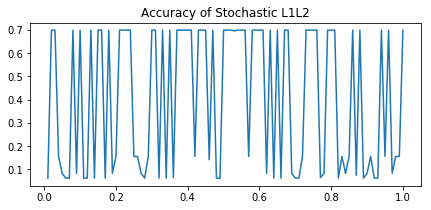

In [539]:
%%time
#Stochastic L1L2
C_series = np.linspace(0.01,1,100) #generate a series number of C values
maxacc = 0
acc=[]
for i in C_series:
    lr = RegularizedMethodLogisticRegression(method="Stochastic", C=i, regulation="L1L2", eta=0.1, iters=100)
    lr.fit(X_train,y_train)
    yhat = lr.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    if accuracy_score(y_test,yhat) > maxacc: #if the accuracy is larger than pivious one, it will equal to the new largest value
        maxacc = accuracy_score(y_test,yhat) #we keep doing this until try all the c values and find out the largest accuracy and its C value
        maxg = i
print('MAX Accuracy for Stochastic L1L2 is ', maxacc)
print('C is ',maxg)
plt.figure(figsize=(7,3))
plt.plot(C_series, acc)
plt.title('Accuracy of Stochastic L1L2')

MAX Accuracy for Stochastic none is  0.6992613436510728
C is  0.02
Wall time: 259 ms


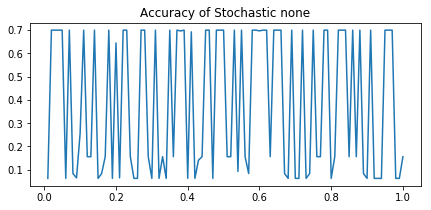

In [540]:
%%time
#Stochastic none
C_series = np.linspace(0.01,1,100) #generate a series number of C values
maxacc = 0
acc=[]
for i in C_series:
    lr = RegularizedMethodLogisticRegression(method="Stochastic", C=i, regulation="none", eta=0.1, iters=100)
    lr.fit(X_train,y_train)
    yhat = lr.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    if accuracy_score(y_test,yhat) > maxacc: #if the accuracy is larger than pivious one, it will equal to the new largest value
        maxacc = accuracy_score(y_test,yhat) #we keep doing this until try all the c values and find out the largest accuracy and its C value
        maxg = i
print('MAX Accuracy for Stochastic none is ', maxacc)
print('C is ',maxg)
plt.figure(figsize=(7,3))
plt.plot(C_series, acc)
plt.title('Accuracy of Stochastic none')

For stochastic, we can see that the accuracy is bouncing aournd really high value and low value. For the L1regulation, the lowest C value will provide higher accuracy. The reason why none regulation do not have unchanged accuracy because stochastic will grab random instance in calculation. So that each time you calculate it, the predicted value might changes.So that the accuracy is not unchanged.

MAX Accuracy for Newton L1 is  0.6813225466056982
C is  1.0
Wall time: 24min 18s


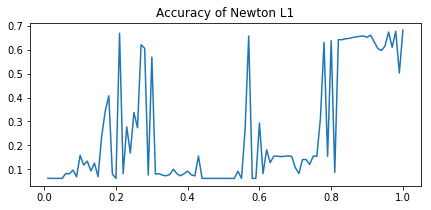

In [541]:
%%time
#newton L1
C_series = np.linspace(0.01,1,100) #generate a series number of C values
maxacc = 0
acc=[]
for i in C_series:
    lr = RegularizedMethodLogisticRegression(method="Newton", C=i, regulation="L1", eta=0.1, iters=100)
    lr.fit(X_train,y_train)
    yhat = lr.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    if accuracy_score(y_test,yhat) > maxacc: #if the accuracy is larger than pivious one, it will equal to the new largest value
        maxacc = accuracy_score(y_test,yhat) #we keep doing this until try all the c values and find out the largest accuracy and its C value
        maxg = i
print('MAX Accuracy for Newton L1 is ', maxacc)
print('C is ',maxg)
plt.figure(figsize=(7,3))
plt.plot(C_series, acc)
plt.title('Accuracy of Newton L1')

MAX Accuracy for Stochastic L1 is  0.7041857193105874
C is  0.01
Wall time: 255 ms


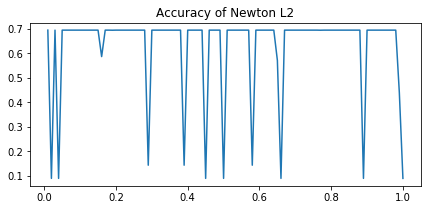

In [616]:

#newton L2
C_series = np.linspace(0.01,1,100) #generate a series number of C values
maxacc = 0
acc=[]
for i in C_series:
    lr = RegularizedMethodLogisticRegression(method="Newton", C=i, regulation="L2", eta=0.1, iters=100)
    lr.fit(X_train,y_train)
    yhat = lr.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    if accuracy_score(y_test,yhat) > maxacc: #if the accuracy is larger than pivious one, it will equal to the new largest value
        maxacc = accuracy_score(y_test,yhat) #we keep doing this until try all the c values and find out the largest accuracy and its C value
        maxg = i
print('MAX Accuracy for Newton L2 is ', maxacc)
print('C is ',maxg)
plt.figure(figsize=(7,3))
plt.plot(C_series, acc)
plt.title('Accuracy of Newton L2')

MAX Accuracy for Newton L1L2 is  0.6874991206472036
C is  0.18000000000000002


Text(0.5, 1.0, 'Accuracy of Newton L1L2')

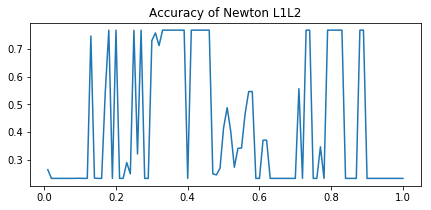

In [626]:

#newton L1L2
C_series = np.linspace(0.01,1,100) #generate a series number of C values
maxacc = 0
acc=[]
for i in C_series:
    lr = RegularizedMethodLogisticRegression(method="Newton", C=i, regulation="L1L2", eta=0.1, iters=100)
    lr.fit(X_test,y_test)
    yhat = lr.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    if accuracy_score(y_test,yhat) > maxacc: #if the accuracy is larger than pivious one, it will equal to the new largest value
        maxacc = accuracy_score(y_test,yhat) #we keep doing this until try all the c values and find out the largest accuracy and its C value
        maxg = i
print('MAX Accuracy for Newton L1L2 is ', maxacc)
print('C is ',maxg)
plt.figure(figsize=(7,3))
plt.plot(C_series, acc)
plt.title('Accuracy of Newton L1L2')

MAX Accuracy for Newton non is  0.6999648258881463
C is  0.01


Text(0.5, 1.0, 'Accuracy of Newton none')

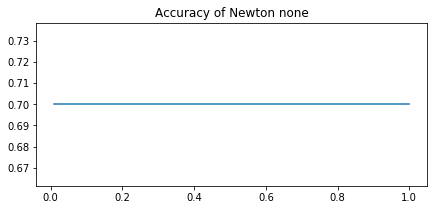

In [548]:

#newton none
C_series = np.linspace(0.01,1,100) #generate a series number of C values
maxacc = 0
acc=[]
for i in C_series:
    lr = RegularizedMethodLogisticRegression(method="Newton", C=i, regulation="none", eta=0.1, iters=100)
    lr.fit(X_train,y_train)
    yhat = lr.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    if accuracy_score(y_test,yhat) > maxacc: #if the accuracy is larger than pivious one, it will equal to the new largest value
        maxacc = accuracy_score(y_test,yhat) #we keep doing this until try all the c values and find out the largest accuracy and its C value
        maxg = i
print('MAX Accuracy for Newton non is ', maxacc)
print('C is ',maxg)
plt.figure(figsize=(7,3))
plt.plot(C_series, acc)
plt.title('Accuracy of Newton none')

For newton method, in L2 high accuracy when C is small. Other regulation have different C to reach the highest accuracy value. I found out that for the technique newton and L2 regulation, it have the highest Accuraccy with C = 0.01 compare to all other method.

In [544]:
%%time

lr = RegularizedMethodLogisticRegression(method="Newton", C=0.01, regulation="L2", eta=0.1, iters=100)
lr.fit(X_train,y_train)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.7041857193105874
Wall time: 13.7 s


### Is your method of selecting parameters justified?

Yes, I found out that for the technique newton and L2 regulation, it have the highest Accuraccy with C = 0.01 comparing to other method and regulation combination. The parameters I selected is highly suitable for our traning set, I got 70% accuracy which is really good. This result of accuracy shows that for our testing set and training set, our classfier is good to use.

### Do you think there is any "data snooping" involved with this method of selecting parameters?

https://www.quora.com/What-is-data-snooping

Data snooping occurs when a given set of data is used more than once for purposes of inference or model selection. When such data reuse occurs, there is always the possibility that any satisfactory results obtained may simply be due to chance rather than to any merit inherent in the method yielding the results.

Sullivan, Timmermann, White (1999)

This is the definition I found online. Base on their theory, in my model, I do use more than once of my dataset for finding the best parameters. So at the beginning, I have no idea which parameters are the best for performance, after I run mutiple combinations of parameters, I can select the best parameters for my model. I think this is data snooping. 

# Comparing to sklearn

In [504]:
%%time
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# how do we compare now to sklearn?
from sklearn.linear_model import LogisticRegression as sklr 
start_time = time.clock()
lr_sk = sklr (solver='newton-cg',n_jobs=-1,penalty='l2',C=0.01,max_iter=100) 
lr_sk.fit(X_train,y_train) # no need to add bias term, sklearn does it internally!!
yhat = lr_sk.predict(X_test)
skacc = accuracy_score(y_test,yhat)
print('Accuracy of: ',accuracy_score(y_test,yhat))
sktime = time.clock() - start_time
print(sktime, "seconds")

D:\APP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of:  0.7048892015476609
0.18315459999939776 seconds
Wall time: 183 ms


In [502]:
%%time
import time
start_time = time.clock()
lr = RegularizedMethodLogisticRegression(method="Newton", C=0.01, regulation="L2", eta=0.1, iters=100)
lr.fit(X_train,y_train)
yhat = lr.predict(X_test)
ouracc = accuracy_score(y_test,yhat)
print('Accuracy of: ',accuracy_score(y_test,yhat))
ourtime = time.clock() - start_time
print(ourtime, "seconds")

Accuracy of:  0.7041857193105874
15.60358769999948 seconds
Wall time: 15.6 s


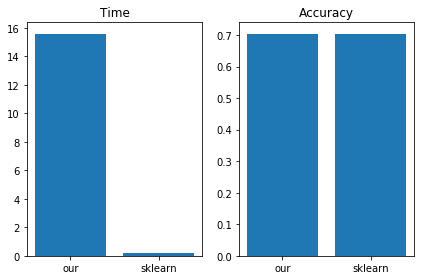

Sklearn is  85.0 times faster than me.


In [505]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axes.html
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.setp(axes, xticks=[0, 1], xticklabels=['our', 'sklearn'])

y_axis = [ourtime, sktime]
x_axis = [0, 1]
plt.sca(axes[0])
plt.bar(x_axis, y_axis)
axes[0].set_title('Time')

plt.sca(axes[1])
y_axis = [ouracc,skacc]
x_axis = [0, 1]
plt.bar(x_axis, y_axis)
axes[1].set_title('Accuracy')

plt.tight_layout()
plt.show()
print('Sklearn is ',round(ourtime/sktime,0),'times faster than me.')

It is really clear to see that we have almost the same accuracy as sklearn does. However, I used 85 times more time than sklearn. This is huge difference which I can not reach. The reason behind this becasue sklearn is written by C and I wrote in np and other package. The packages I used is base on C, so my code is reach C through np package. But sklearn is directly reach C. And we all know C is running really fast. This just like sklearn is speaking face to face, it is clear. But I am talking through a phone. Of course face to face is more clear and there is no delay. 

On the other hand, sklearn was written by many perfessional person, the already optimized the code so it can be running so fast. Also I change n_job to -1 in sklearn which will using all my cpu core to run. I monitored my cpu performance and i noticed that sklearn can use all my cpu capacity. For my own code, my cpu only can run 50% cpu capacity. So I believe sklearn also have better cpu optimization than me code.

# Deployment

My model have almost the same accuracy than sklearn does. However, i am 85 times slower than sklearn. In the most situations, I suggest use sklearn, becasue it is faster, accurate and also realiable. Sklearn is written by many professional person, so we can trust them. For large data set, sklearn is really efficient way to run.

On the other hand, my model has advantage, becasue I can know every step of calculation. I can adjust every details in my model such as the way of calculating the gradient. That is sklearn can not do. If I want to add a new regulation method, i can easily do it. But for sklearn, if they did not upgrade the new method to package, you can not use it. Due to time problem, my model will be better when the dataset is not too big and you need to adjust some details. Otherwise, sklearn is best chooice.

# Exceptional Work

In [583]:
%%time
# from last time, our logistic regression algorithm is given by (including everything we previously had):
class BinaryLogisticRegression:
    def __init__(self, eta, iterations=20, C=0.01):
        self.eta = eta
        self.iters = iterations
        self.C = C
        # internally we will store the weights as self.w_ to keep with sklearn conventions
        
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    # convenience, private:
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # vectorized gradient calculation with regularization using L2 Norm
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C
        
        return gradient
    
    # public:
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 

Wall time: 0 ns


In [589]:
%%time
# for this, we won't perform our own BFGS implementation 
# (it takes a good deal of code and understanding of the algorithm)
# luckily for us, scipy has its own BFGS implementation:
from scipy.optimize import fmin_bfgs
from sklearn.metrics import mean_squared_error
class BFGSBinaryLogisticRegression(BinaryLogisticRegression):
    def __init__(self, eta, iterations=20, C=0.01):
        self.eta = eta
        self.iters = iterations
        self.C = C
    @staticmethod
    def objective_function(w,X,y,C):
        g = expit(X @ w)
        return mean_squared_error(y,g)#mean square error as objective function 

    @staticmethod
    def objective_gradient(w,X,y,C):
        g = expit(X @ w)
        ydiff = y-g # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(w.shape)
        gradient[1:] += -2 * w[1:] * C
        return -gradient
    
    # just overwrite fit function
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = fmin_bfgs(self.objective_function, # what to optimize
                            np.zeros((num_features,1)), # starting point
                            fprime=self.objective_gradient, # gradient function
                            args=(Xb,y,self.C), # extra args for gradient and objective function
                            gtol=1e-03, # stopping criteria for gradient, |v_k|
                            maxiter=self.iters, # stopping criteria iterations
                            disp=False)
        
        self.w_ = self.w_.reshape((num_features,1))
            


Wall time: 0 ns


In [620]:
#change to binary y
y_train = (y_train>1).astype(np.int)
y_test = (y_test>1).astype(np.int)


In [623]:
%%time
bfgslr = BFGSBinaryLogisticRegression(eta=0.1, iterations=10, C=0.01) # note that we need only a few iterations here

bfgslr.fit(X_train,y_train)
yhat = bfgslr.predict(X_test)
print(bfgslr)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Binary Logistic Regression Object with coefficients:
[[-0.00518144]
 [-0.00333278]
 [-0.13011618]
 [-0.9162403 ]
 [-0.37527377]
 [-0.10286017]
 [-0.11056011]
 [-0.00117108]]
Accuracy of:  0.7674991206472036
Wall time: 87.3 ms


I implement an optimization technique for logistic regression using mean square error as your objective function (instead of binary entropy). And I change the y variable to binary which is no medal is 0 and have metal is 1. My new model is able to solve the binary logistic regression problem. The accuracy is not bad 76%.